<a href="https://colab.research.google.com/github/heasun0111/Machine-learning/blob/master/CNN%2BLearning%20Rate(0.05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0001 Loss: 2.314 Accuracy = 8.0000000
Epoch: 0002 Loss: 2.307 Accuracy = 6.0000000
Epoch: 0003 Loss: 2.298 Accuracy = 15.0000000
Epoch: 0004 Loss: 2.305 Accuracy = 11.0000000
Epoch: 0005 Loss: 2.295 Accuracy = 11.0000000
Epoch: 0006 Loss: 2.298 Accuracy = 11.0000000
Epoch: 0007 Loss: 2.292 Accuracy = 23.0000000
Epoch: 0008 Loss: 2.283 Accuracy = 19.0000000
Epoch: 0009 Loss: 2.300 Accuracy = 14.0000000
Epoch: 0010 Loss: 2.285 Accuracy = 30.0000000
Epoch: 0011 Loss: 2.283 Accuracy = 16.0000000
Epoch: 0012 Loss: 2.288 Accuracy = 14.0000000
Epoch: 0013 Loss: 2.281 Accuracy = 26.0000000
Epoch: 0014 Loss: 2.284 Accuracy = 16.0000000
Epoch: 0015 Loss: 2.286 Accuracy = 22.0000000
Epoch: 0016 Loss: 2.276 Accuracy = 40.0000000
Epoch: 0017 Loss: 2.271 Accuracy = 38.0000000
Epoch: 0018 Loss: 2.266 Accuracy = 44.0000000
Epoch: 0019 Loss: 2.265 Accuracy = 40.0000000
Epoch: 0020 Loss: 2.268 Accuracy = 33.0000000
Epoch: 0021 Loss: 2.264 Accuracy = 27.0000000
Epoch: 0022 Loss: 2.261 Accuracy = 3

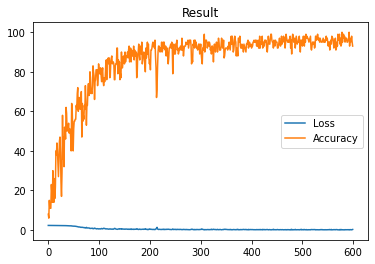

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim


batch_size = 100
training_epoch = 15

download_root = './MNIST_DOWNLOAD'
dataset = datasets.MNIST(
    download_root, transform=transforms.ToTensor(), train=True, download=True)

train_data = datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

dataloader = DataLoader(dataset = train_data , batch_size=batch_size, shuffle=True, drop_last = True)


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        #self.conv3 = nn.Conv2d(in_channels=50, out_channels=70, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        #x = F.relu(self.conv3(x))
        #x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.05)

cnn.train()

epochs=[]
losses=[]
accuracy=[]


for index, (data, target) in enumerate(train_loader):
    correct=0  
    optimizer.zero_grad()
    pred = cnn.forward(data)
    output = cnn(data)
    loss = criterion(output, target)
    percent=pred.data.numpy()    
    loss.backward()
    optimizer.step()

    for i in range(batch_size):
        if(np.argmax(percent[i]) == int(target[i])):
            correct +=1
    
    epochs.append(int(format(index+1)))
    losses.append(float(format(loss)))
    accuracy.append(float(format(correct/batch_size*100)))

    print('Epoch:', '%04d' % (index+1), 'Loss:', '{:.3f}'.format(loss), 'Accuracy =', '{:.7f}'.format(correct/batch_size*100))
    

print('Learning finished')

cnn.eval()

plt.plot(losses)
plt.plot(accuracy)
plt.title('Result')
plt.legend(['Loss','Accuracy'])
plt.show()
  